## Logit Function

Text(0,0.5,'Logit - L')

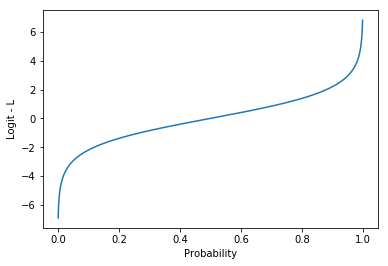

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def logit(x):
    return np.log( x / (1 - x) )

x = np.arange(0.001,0.999, 0.0001)
y = [logit(n) for n in x]
plt.plot(x,y)
plt.xlabel("Probability")
plt.ylabel("Logit - L")


## Sigmoid Curve

Text(0,0.5,'Probability')

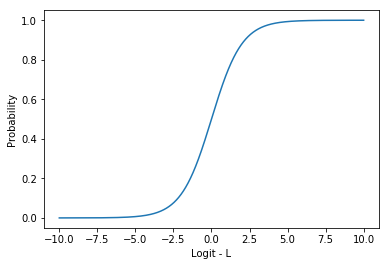

In [2]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.plot(x,y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")


# Using the Breast Cancer Wisconsin (Diagnostic) Data Set

## Examining the Relationship Between Features

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


## Plotting the Features in 2D 

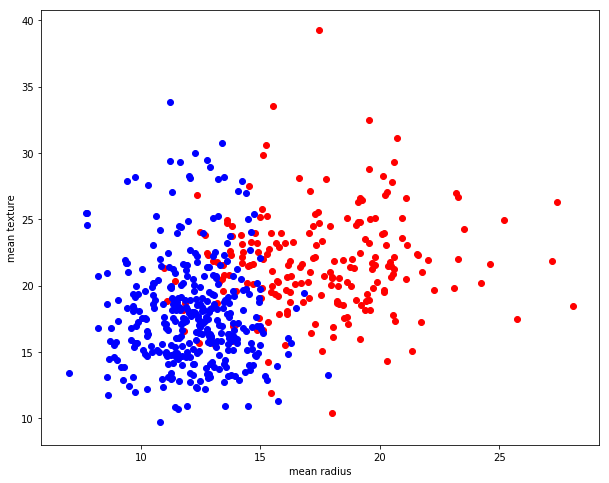

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#---copy from dataset into a 2-d list---
X = []
for target in range(2):
    X.append([[], []])
    for i in range(len(cancer.data)):              # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture

colours = ("r", "b")   # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()


## Plotting in 3D

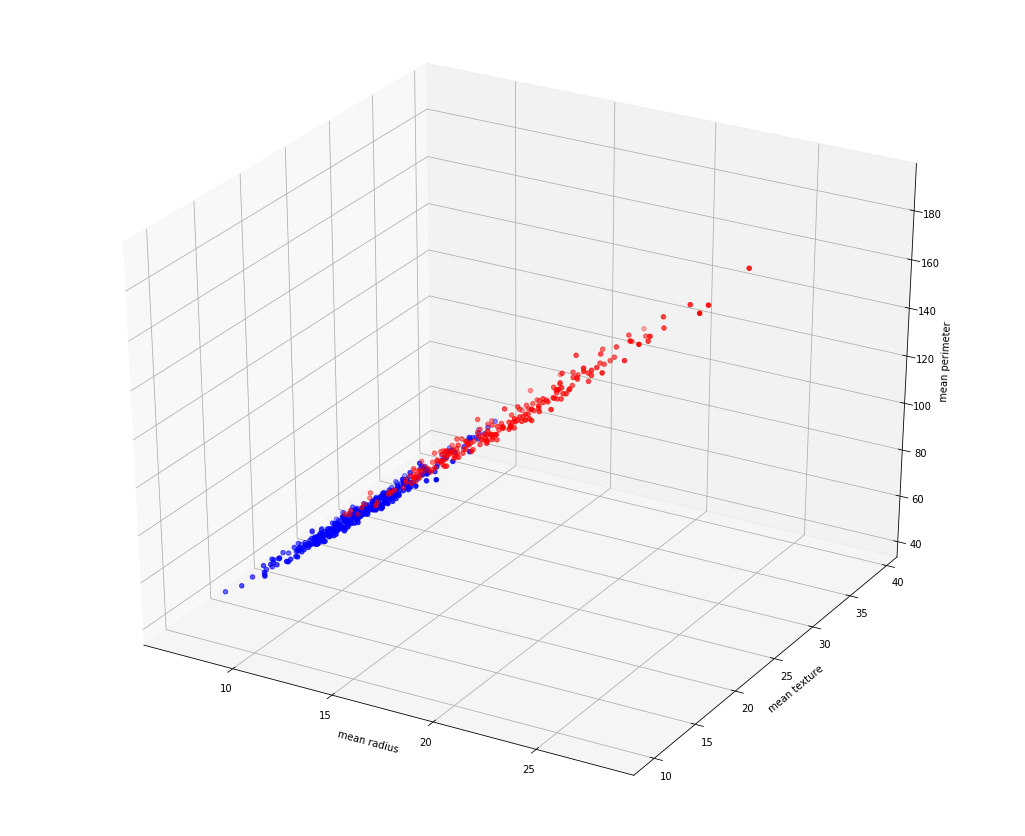

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#---copy from dataset into a 2-d array---
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)):    # target is 0,1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])

colours = ("r", "b")   # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               X[target][2],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()


# Exercises
---

1. Try the above in a python file.

## Training Using One Feature

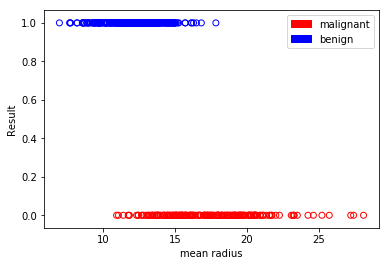

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()   # Load dataset
x = cancer.data[:,0]            # mean radius
y = cancer.target               # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'}    # 0: malignant, 1: benign

plt.scatter(x,y,
            facecolors='none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
            cmap=colors)

plt.xlabel("mean radius")
plt.ylabel("Result")

red   = mpatches.Patch(color='red',   label='malignant')
blue  = mpatches.Patch(color='blue',  label='benign')

plt.legend(handles=[red, blue], loc=1)


### Finding the Intercept and Coefficient

In [7]:
from sklearn import linear_model
import numpy as np

log_regress = linear_model.LogisticRegression()

#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1),
                y = y)

#---print trained model intercept---
print(log_regress.intercept_)     # [ 8.19393897]

#---print trained model coefficients---
print(log_regress.coef_)          # [[-0.54291739]]


[8.19393897]
[[-0.54291739]]


### Plotting the Sigmoid Curve

Text(0,0.5,'Probability')

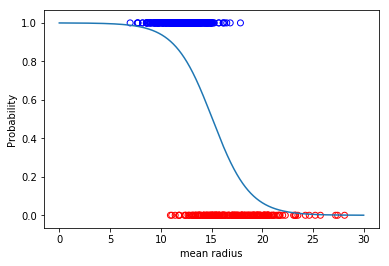

In [8]:
def sigmoid(x):
    return (1 / (1 +
        np.exp(-(log_regress.intercept_[0] +
        (log_regress.coef_[0][0] * x)))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.scatter(x,y,
    facecolors='none',
    edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
    cmap=colors)

plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")


### Making Predictions

In [9]:
print(log_regress.predict_proba(20)) # [[0.93489354 0.06510646]]
print(log_regress.predict(20)[0])    # 0


[[0.93489354 0.06510646]]
0


In [10]:
print(log_regress.predict_proba(8))  # [[0.02082411 0.97917589]]
print(log_regress.predict(8)[0])     # 1


[[0.02082411 0.97917589]]
1


## Training the Model Using All Features

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()        # Load dataset


In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
                              cancer.data,               # features
                              cancer.target,             # labels
                              test_size = 0.25,          # split ratio
                              random_state = 1,          # set random seed
                              stratify = cancer.target)  # randomize based on labels


In [13]:
from sklearn import linear_model
x = train_set[:,0:30]         # mean radius
y = train_labels              # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x,
                y = y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
print(log_regress.intercept_)     #
print(log_regress.coef_)          #


[0.34529326]
[[ 1.80102698e+00  2.55838627e-01 -3.75711783e-02 -5.89323948e-03
  -9.57991727e-02 -3.16732918e-01 -5.06727226e-01 -2.53215234e-01
  -2.26158948e-01 -1.03724689e-02  4.04853858e-03  9.76885850e-01
   2.02808694e-01 -1.22307168e-01 -8.25651517e-03 -1.41222085e-02
  -5.50059784e-02 -3.33022746e-02 -3.05626370e-02  1.10889208e-04
   1.62872980e+00 -4.35105392e-01 -1.50298022e-01 -2.32807048e-02
  -1.94391272e-01 -9.91556375e-01 -1.42903149e+00 -5.40766476e-01
  -6.28737762e-01 -9.05111242e-02]]


### Testing the Model

In [15]:
import pandas as pd

#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

#---assign column names to prediction---
preds_prob.columns = ["Malignant", "Benign"]

#---get the predicted class labels---
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())


   Malignant        Benign  Prediction  Original Result
0   0.999812  1.881450e-04           0                0
1   0.998358  1.641847e-03           0                0
2   0.057988  9.420119e-01           1                1
3   1.000000  9.688340e-08           0                0
4   0.207272  7.927283e-01           1                0


### Getting the Confusion Matrix

In [16]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))


---Confusion Matrix---
col_0   0   1
row_0        
0      48   3
1       5  87


In [17]:
from sklearn import metrics
#---view the confusion matrix---
print(metrics.confusion_matrix(y_true = test_labels,  # True labels
                               y_pred = preds))       # Predicted labels


[[48  5]
 [ 3 87]]


In [18]:
#---get the accuracy of the prediction---
print("---Accuracy---")
print(log_regress.score(X = test_set ,
                        y = test_labels))


---Accuracy---
0.9440559440559441


In [19]:
# View summary of common classification metrics
print("---Metrices---")
print(metrics.classification_report(
      y_true = test_labels,
      y_pred = preds))


---Metrices---
             precision    recall  f1-score   support

          0       0.94      0.91      0.92        53
          1       0.95      0.97      0.96        90

avg / total       0.94      0.94      0.94       143



### Receiver Operating Characteristic (ROC) Curve

In [20]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(test_set)
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(test_labels, preds)


In [21]:
print(fpr)
print(tpr)
print(threshold)


[0.         0.         0.01886792 0.01886792 0.03773585 0.03773585
 0.09433962 0.09433962 0.11320755 0.11320755 0.18867925 0.18867925
 1.        ]
[0.01111111 0.88888889 0.88888889 0.91111111 0.91111111 0.94444444
 0.94444444 0.96666667 0.96666667 0.98888889 0.98888889 1.
 1.        ]
[9.99991096e-01 9.36979446e-01 9.18041190e-01 9.03210240e-01
 8.58502443e-01 8.48192899e-01 5.43417268e-01 5.25754943e-01
 3.71917403e-01 2.71109566e-01 1.21489730e-01 1.18592685e-01
 1.30871110e-21]


### Plotting the ROC and Finding the Area Under the Curve (AUC)

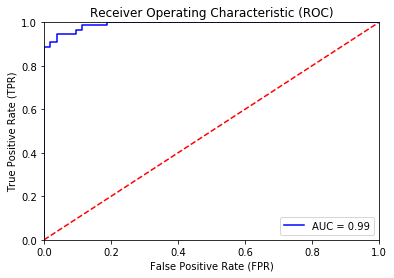

In [22]:
#---find the area under the curve---
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()
